# Homework 3: Prediction and Classification
---

# Introduction

In this assignment you will be using regression and classification to explore different data sets.  

**First**: You will use data from before 2002 in the [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics) to create a metric for picking baseball players using linear regression. This is same database we used in Homework 1. This database contains the "complete batting and pitching statistics from 1871 to 2013, plus fielding statistics, standings, team stats, managerial records, post-season data, and more". [Documentation provided here](http://seanlahman.com/files/database/readme2012.txt).

!["Sabermetrics Science"](http://saberseminar.com/wp-content/uploads/2012/01/saber-web.jpg)
http://saberseminar.com/wp-content/uploads/2012/01/saber-web.jpg

**Second**: You will use the famous [iris](http://en.wikipedia.org/wiki/Iris_flower_data_set) data set to perform a $k$-neareast neighbor classification using cross validation.  While it was introduced in 1936, it is still [one of the most popular](http://archive.ics.uci.edu/ml/) example data sets in the machine learning community. Wikipedia describes the data set as follows: "The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres." Here is an illustration what the four features measure:

!["iris data features"](http://sebastianraschka.com/Images/2014_python_lda/iris_petal_sepal.png)
http://sebastianraschka.com/Images/2014_python_lda/iris_petal_sepal.png

**Third**: You will investigate the influence of higher dimensional spaces on the classification using another standard data set in machine learning called the The [digits data set](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html).  This data set is similar to the MNIST data set discussed in the lecture. The main difference is, that each digit is represented by an 8x8 pixel image patch, which is considerably smaller than the 28x28 pixels from MNIST. In addition, the gray values are restricted to 16 different values (4 bit), instead of 256 (8 bit) for MNIST. 

**Finally**: In preparation for Homework 4, we want you to read through the following articles related to predicting the 2014 Senate Midterm Elections. 

* [Nate Silver's Methodology at while at NYT](http://fivethirtyeight.blogs.nytimes.com/methodology/)
* [How The FiveThirtyEight Senate Forecast Model Works](http://fivethirtyeight.com/features/how-the-fivethirtyeight-senate-forecast-model-works/)
* [Pollster Ratings v4.0: Methodology](http://fivethirtyeight.com/features/pollster-ratings-v40-methodology/)
* [Pollster Ratings v4.0: Results](http://fivethirtyeight.com/features/pollster-ratings-v40-results/)
* [Nate Silver versus Sam Wang](http://www.washingtonpost.com/blogs/plum-line/wp/2014/09/17/nate-silver-versus-sam-wang/)
* [More Nate Silver versus Sam Wang](http://www.dailykos.com/story/2014/09/09/1328288/-Get-Ready-To-Rumbllllle-Battle-Of-The-Nerds-Nate-Silver-VS-Sam-Wang)
* [Nate Silver explains critisims of Sam Wang](http://politicalwire.com/archives/2014/10/02/nate_silver_rebuts_sam_wang.html)
* [Background on the feud between Nate Silver and Sam Wang](http://talkingpointsmemo.com/dc/nate-silver-sam-wang-feud)
* [Are there swing voters?]( http://www.stat.columbia.edu/~gelman/research/unpublished/swing_voters.pdf)



---

## Load Python modules

In [291]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import requests 
import StringIO
import zipfile
import numpy as np
import pandas as pd # pandas
import matplotlib.pyplot as plt # module for plotting 

# If this module is not already installed, you may need to install it. 
# You can do this by typing 'pip install seaborn' in the command line
import seaborn as sns 

import sklearn
import sklearn.datasets
import sklearn.model_selection
import sklearn.decomposition
import sklearn.neighbors
import sklearn.metrics

# Problem 1: Sabermetrics

Using data preceding the 2002 season, pick 10 offensive players keeping the payroll under $20 million (assign each player the median salary). Predict how many games this team would win in a 162 game season.  

In this problem we will be returning to the [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics) that we used in Homework 1.  From this database, we will be extract five data sets containing information such as yearly stats and standing, batting statistics, fielding statistics, player names, player salaries and biographical information. You will explore the data in this database from before 2002 and create a metric for picking players. 

#### Problem 1(a) 

Load in [these CSV files](http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip) from the [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics). For this assignment, we will use the 'Teams.csv', 'Batting.csv', 'Salaries.csv', 'Fielding.csv', 'Master.csv' tables. Read these tables into separate pandas DataFrames with the following names. 

CSV file name | Name of pandas DataFrame
:---: | :---: 
Teams.csv | teams
Batting.csv | players
Salaries.csv | salaries
Fielding.csv | fielding
Master.csv | master

In [2]:
### Your code here ###
import requests
import zipfile
import StringIO

link = 'http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip'
r = requests.get(link).content

In [3]:
s = StringIO.StringIO(r)
zf = zipfile.ZipFile(s, 'r')
print zf.namelist()

['SchoolsPlayers.csv', 'SeriesPost.csv', 'Teams.csv', 'TeamsFranchises.csv', 'TeamsHalf.csv', 'AllstarFull.csv', 'Appearances.csv', 'AwardsManagers.csv', 'AwardsPlayers.csv', 'AwardsShareManagers.csv', 'AwardsSharePlayers.csv', 'Batting.csv', 'BattingPost.csv', 'Fielding.csv', 'FieldingOF.csv', 'FieldingPost.csv', 'HallOfFame.csv', 'Managers.csv', 'ManagersHalf.csv', 'Master.csv', 'Pitching.csv', 'PitchingPost.csv', 'readme2013.txt', 'Salaries.csv', 'Schools.csv']


In [4]:
teams = pd.read_csv(zf.open("Teams.csv"))
players = pd.read_csv(zf.open("Batting.csv"))
salaries = pd.read_csv(zf.open("Salaries.csv"))
fielding = pd.read_csv(zf.open("Fielding.csv"))
master = pd.read_csv(zf.open("Master.csv"))

#### Problem 1(b)

Calculate the median salary for each player and create a pandas DataFrame called `medianSalaries` with four columns: (1) the player ID, (2) the first name of the player, (3) the last name of the player and (4) the median salary of the player. Show the head of the `medianSalaries` DataFrame.   

In [5]:
master.columns

Index([u'playerID', u'birthYear', u'birthMonth', u'birthDay', u'birthCountry',
       u'birthState', u'birthCity', u'deathYear', u'deathMonth', u'deathDay',
       u'deathCountry', u'deathState', u'deathCity', u'nameFirst', u'nameLast',
       u'nameGiven', u'weight', u'height', u'bats', u'throws', u'debut',
       u'finalGame', u'retroID', u'bbrefID'],
      dtype='object')

In [6]:
players.head()

,playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
0,aardsda01,2004,1,SFN,NL,11,11.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
1,aardsda01,2006,1,CHN,NL,45,43.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0
2,aardsda01,2007,1,CHA,AL,25,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,aardsda01,2008,1,BOS,AL,47,5.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0
4,aardsda01,2009,1,SEA,AL,73,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [7]:
### Your code here ###
# Group by playerID, and find the median salary
group = salaries.groupby(salaries.playerID, as_index=False).median()
group.head()

,playerID,yearID,salary
0,aardsda01,2009.0,419000.0
1,aasedo01,1987.5,612500.0
2,abadan01,2006.0,327000.0
3,abadfe01,2011.5,451500.0
4,abbotje01,1999.5,255000.0


In [8]:
# Create df from master, merge salary in group.
medianSalaries = pd.concat([master.playerID, master.nameFirst, master.nameLast], axis=1)
medianSalaries = medianSalaries.merge(group, on="playerID")
del medianSalaries['yearID']

In [9]:
medianSalaries.head()

,playerID,nameFirst,nameLast,salary
0,aardsda01,David,Aardsma,419000.0
1,aasedo01,Don,Aase,612500.0
2,abadan01,Andy,Abad,327000.0
3,abadfe01,Fernando,Abad,451500.0
4,abbotje01,Jeff,Abbott,255000.0


#### Problem 1(c)

Now, consider only team/season combinations in which the teams played 162 Games. Exclude all data from before 1947. Compute the per plate appearance rates for singles, doubles, triples, HR, and BB. Create a new pandas DataFrame called `stats` that has the teamID, yearID, wins and these rates.

**Hint**: Singles are hits that are not doubles, triples, nor HR. Plate appearances are base on balls plus at bats.

In [10]:
### Your code here ###
print teams.columns

Index([u'yearID', u'lgID', u'teamID', u'franchID', u'divID', u'Rank', u'G',
       u'Ghome', u'W', u'L', u'DivWin', u'WCWin', u'LgWin', u'WSWin', u'R',
       u'AB', u'H', u'2B', u'3B', u'HR', u'BB', u'SO', u'SB', u'CS', u'HBP',
       u'SF', u'RA', u'ER', u'ERA', u'CG', u'SHO', u'SV', u'IPouts', u'HA',
       u'HRA', u'BBA', u'SOA', u'E', u'DP', u'FP', u'name', u'park',
       u'attendance', u'BPF', u'PPF', u'teamIDBR', u'teamIDlahman45',
       u'teamIDretro'],
      dtype='object')


- yearID >= 1947
- G == 162
- Singles = H - (2B + 3B + HR)
- Plate = BB + AB 

In [11]:
pd.options.mode.chained_assignment = None  # default='warn'

stats = teams[(teams["yearID"] >= 1947) & (teams["G"] == 162)]
stats["S"] = stats["H"] - (stats["2B"]+stats["3B"]+stats["HR"])
stats["Plate"] = stats["BB"] + stats["AB"]
stats["1"] = 1.0*stats["S"]/stats["Plate"]
stats["2"] = 1.0*stats["2B"]/stats["Plate"]
stats["3"] = 1.0*stats["3B"]/stats["Plate"]
stats["HR"] = 1.0*stats["HR"]/stats["Plate"]
stats["BB"] = 1.0*stats["BB"]/stats["Plate"]

stats = stats[["teamID", "yearID", "W", "1", "2", "3", "HR", "BB"]]

stats.head()

,teamID,yearID,W,1,2,3,HR,BB
1366,LAA,1961,70,0.147748,0.035708,0.003604,0.030958,0.111548
1367,KC1,1961,61,0.164751,0.035982,0.007829,0.014993,0.096618
1377,NYA,1962,96,0.167148,0.038536,0.004656,0.031952,0.093770
1379,LAA,1962,86,0.159482,0.038027,0.005737,0.022455,0.098672
1381,CHA,1962,85,0.165797,0.040756,0.009129,0.014998,0.101076


#### Problem 1(d)

Is there a noticeable time trend in the rates computed computed in Problem 1(c)? 

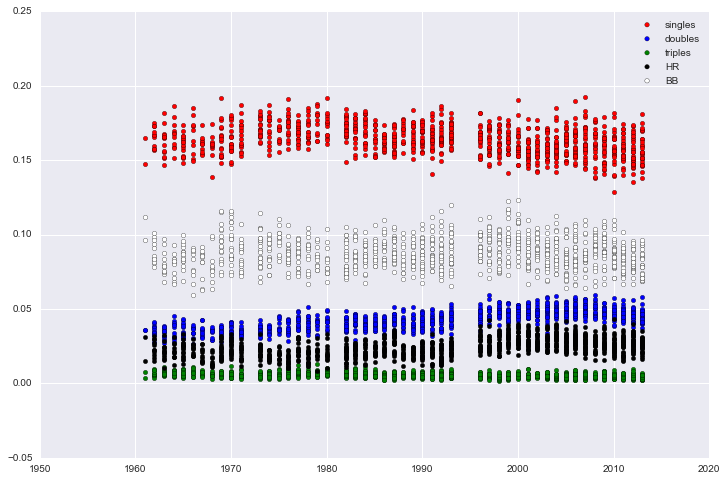

In [12]:
### Your code here ###
plt.figure(figsize=(12, 8))
plt.scatter(stats["yearID"], stats["1"], c='red', label="singles")
plt.scatter(stats["yearID"], stats["2"], c='blue', label="doubles")
plt.scatter(stats["yearID"], stats["3"], c='green', label="triples")
plt.scatter(stats["yearID"], stats["HR"], c='black', label="HR")
plt.scatter(stats["yearID"], stats["BB"], c='white', label="BB")
plt.legend()

**Stays the same**, tad upward trend for triples, HRs in '00s.

#### Problem 1(e) 

Using the `stats` DataFrame from Problem 1(c), adjust the singles per PA rates so that the average across teams for each year is 0. Do the same for the doubles, triples, HR, and BB rates. 

In [13]:
### Your code here ###
stats.groupby(stats.yearID, as_index=False).mean().head()

,yearID,W,1,2,3,HR,BB
0,1961,65.500000,0.156249,0.035845,0.005717,0.022975,0.104083
1,1962,78.454545,0.165632,0.035853,0.006777,0.023811,0.088590
2,1963,78.142857,0.162467,0.034020,0.006896,0.021254,0.080336
3,1964,81.727273,0.167251,0.036336,0.006748,0.021548,0.079152
4,1965,82.000000,0.160042,0.035539,0.006534,0.022693,0.085745


In [14]:
def meanNormalizeRates(df):
        subRates = df[["1","2","3","HR","BB"]]
        df[["1","2","3","HR","BB"]] = subRates - subRates.mean(axis=0)
        return df

stats = stats.groupby('yearID').apply(meanNormalizeRates)

In [15]:
stats.head()

,teamID,yearID,W,1,2,3,HR,BB
1366,LAA,1961,70,-0.008502,-0.000137,-0.002113,0.007983,0.007465
1367,KC1,1961,61,0.008502,0.000137,0.002113,-0.007983,-0.007465
1377,NYA,1962,96,0.001516,0.002683,-0.002121,0.008141,0.005180
1379,LAA,1962,86,-0.006150,0.002174,-0.001040,-0.001356,0.010082
1381,CHA,1962,85,0.000165,0.004904,0.002352,-0.008813,0.012486


#### Problem 1(f)

Build a simple linear regression model to predict the number of wins from the average adjusted singles, double, triples, HR, and BB rates. To decide which of these terms to include fit the model to data from 2002 and compute the average squared residuals from predictions to years past 2002. Use the fitted model to define a new sabermetric summary: offensive predicted wins (OPW). Hint: the new summary should be a linear combination of one to five of the five rates.


In [18]:
# Combinations of features
import itertools
feat = ["1", "2", "3", "HR", "BB"]
for i in xrange(1,len(feat)+1):
    print list(itertools.combinations(feat,i))

[('1',), ('2',), ('3',), ('HR',), ('BB',)]
[('1', '2'), ('1', '3'), ('1', 'HR'), ('1', 'BB'), ('2', '3'), ('2', 'HR'), ('2', 'BB'), ('3', 'HR'), ('3', 'BB'), ('HR', 'BB')]
[('1', '2', '3'), ('1', '2', 'HR'), ('1', '2', 'BB'), ('1', '3', 'HR'), ('1', '3', 'BB'), ('1', 'HR', 'BB'), ('2', '3', 'HR'), ('2', '3', 'BB'), ('2', 'HR', 'BB'), ('3', 'HR', 'BB')]
[('1', '2', '3', 'HR'), ('1', '2', '3', 'BB'), ('1', '2', 'HR', 'BB'), ('1', '3', 'HR', 'BB'), ('2', '3', 'HR', 'BB')]
[('1', '2', '3', 'HR', 'BB')]


In [19]:
### Your code here ###
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

df_train = stats[stats["yearID"] >= 2002] 
df_test = stats[stats["yearID"] < 2002]

# We need just the values!
x_train = df_train[feat].values
y_train = df_train[["W"]].values
x_test = df_test[feat].values
y_test = df_test[["W"]].values

clf.fit(x_train, y_train)

/Users/Sachin/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
print "Coeff:", clf.coef_
print "MSE:", np.mean((y_test - clf.predict(x_test))**2)

Coeff: [[ 477.46262765  407.16990814  397.35024579  990.10014108  520.23540272]]
MSE: 79.626194223


** Your answer here: ** Model is a linear combination of all 5 rates.

#### Problem 1(g)

Now we will create a similar database for individual players. Consider only player/year combinations in which the player had at least 500 plate appearances. Consider only the years we considered for the calculations above (after 1947 and seasons with 162 games). For each player/year compute singles, doubles, triples, HR, BB per plate appearance rates. Create a new pandas DataFrame called `playerstats` that has the playerID, yearID and the rates of these stats.  Remove the average for each year as for these rates as done in Problem 1(e). 

In [21]:
### Your code here ###
players.columns

Index([u'playerID', u'yearID', u'stint', u'teamID', u'lgID', u'G',
       u'G_batting', u'AB', u'R', u'H', u'2B', u'3B', u'HR', u'RBI', u'SB',
       u'CS', u'BB', u'SO', u'IBB', u'HBP', u'SH', u'SF', u'GIDP', u'G_old'],
      dtype='object')

In [47]:
players["Plate"] = players["BB"] + players["AB"]
playerstats = players[(players["yearID"]>1947) & (players["Plate"]>=500)]
playerstats["S"] = playerstats["H"] - (playerstats["2B"]+playerstats["3B"]+playerstats["HR"])

playerstats["1"] = 1.0*playerstats["S"]/playerstats["Plate"]
playerstats["2"] = 1.0*playerstats["2B"]/playerstats["Plate"]
playerstats["3"] = 1.0*playerstats["3B"]/playerstats["Plate"]
playerstats["HR"] = 1.0*playerstats["HR"]/playerstats["Plate"]
playerstats["BB"] = 1.0*playerstats["BB"]/playerstats["Plate"]

playerstats = playerstats[["playerID", "yearID", "1", "2", "3", "HR", "BB"]]
playerstats = playerstats.groupby('yearID').apply(meanNormalizeRates)

Show the head of the `playerstats` DataFrame. 

In [48]:
### Your code here ###
playerstats.head()

,playerID,yearID,1,2,3,HR,BB
8,aaronha01,1955,0.001060,0.018570,0.005585,0.011337,-0.027249
9,aaronha01,1956,0.021581,0.013895,0.012578,0.009438,-0.044519
10,aaronha01,1957,0.005503,-0.002189,0.000537,0.036908,-0.012659
11,aaronha01,1958,0.018367,0.011015,-0.002219,0.015398,-0.007762
12,aaronha01,1959,0.016261,0.025762,0.002743,0.028368,-0.022898


#### Problem 1(h)

Using the `playerstats` DataFrame created in Problem 1(g), create a new DataFrame called `playerLS` containing the player's lifetime stats. This DataFrame should contain the playerID, the year the player's career started, the year the player's career ended and the player's lifetime average for each of the quantities (singles, doubles, triples, HR, BB). For simplicity we will simply compute the avaerage of the rates by year (a more correct way is to go back to the totals). 

In [91]:
### Your code here ###
playerLS = playerstats.groupby(playerstats.playerID, as_index=False)[["1",  "2", "3", "HR", "BB"]].mean()
playerLS["startYear"] = playerstats.groupby(playerstats.playerID)["yearID"].min().values
playerLS["endYear"] = playerstats.groupby(playerstats.playerID)["yearID"].max().values

Show the head of the `playerLS` DataFrame. 

In [92]:
### Your code here ###
playerLS.head()

,playerID,1,2,3,HR,BB,startYear,endYear
0,aaronha01,-0.007039,0.006542,-0.000249,0.027814,0.009415,1955,1975
1,abramca01,0.013463,-0.023915,0.002384,0.003842,0.019455,1953,1953
2,abreubo01,-0.008230,0.006438,0.000983,-0.003154,0.050532,1998,2011
3,ackledu01,-0.009186,-0.016607,-0.002044,-0.015187,0.001574,2012,2012
4,adairje01,0.012235,0.003353,-0.002105,-0.013016,-0.037399,1962,1965


#### Problem 1(i)

Compute the OPW for each player based on the average rates in the `playerLS` DataFrame. You can interpret this summary statistic as the predicted wins for a team with 9 batters exactly like the player in question. Add this column to the playerLS DataFrame. Call this colum OPW.

In [93]:
### Your code here ###
# Already trained clf object
inputX = playerLS[["1","2","3","HR","BB"]].values
playerLS["OPW"] = clf.predict(inputX)
playerLS.head()

,playerID,1,2,3,HR,BB,startYear,endYear,OPW
0,aaronha01,-0.007039,0.006542,-0.000249,0.027814,0.009415,1955,1975,112.671829
1,abramca01,0.013463,-0.023915,0.002384,0.003842,0.019455,1953,1953,92.594237
2,abreubo01,-0.008230,0.006438,0.000983,-0.003154,0.050532,1998,2011,103.279523
3,ackledu01,-0.009186,-0.016607,-0.002044,-0.015187,0.001574,2012,2012,54.853724
4,adairje01,0.012235,0.003353,-0.002105,-0.013016,-0.037399,1962,1965,55.058667


#### Problem 1(j)

Add four columns to the `playerLS` DataFrame that contains the player's position (C, 1B, 2B, 3B, SS, LF, CF, RF, or OF), first name, last name and median salary. 

- Position: fielding->Pos
- Rest in median salaries df

In [94]:
### Your code here ###
print medianSalaries.columns
print fielding.columns

Index([u'playerID', u'nameFirst', u'nameLast', u'salary'], dtype='object')
Index([u'playerID', u'yearID', u'stint', u'teamID', u'lgID', u'POS', u'G',
       u'GS', u'InnOuts', u'PO', u'A', u'E', u'DP', u'PB', u'WP', u'SB', u'CS',
       u'ZR'],
      dtype='object')


In [95]:
# Solution: Look up function -> Since players could play in diff positions over their career
from collections import defaultdict

def find_pos(df):
    positions = df.POS
    d = defaultdict(int)
    for pos in positions:
        d[pos] += 1
    result = max(d.iteritems(), key=lambda x: x[1])
    return result[0]

In [96]:
positions_df = fielding.groupby("playerID").apply(find_pos)
positions_df = positions_df.reset_index()
positions_df = positions_df.rename(columns={0:"POS"})
positions_df.head()

,playerID,POS
0,aardsda01,P
1,aaronha01,OF
2,aaronto01,1B
3,aasedo01,P
4,abadan01,1B


In [97]:
playerLS = playerLS.merge(positions_df, how='inner', on="playerID")
playerLS = playerLS.merge(medianSalaries, on="playerID")

Show the head of the `playerLS` DataFrame. 

In [99]:
### Your code here ###
playerLS.head()

,playerID,1,2,3,HR,BB,startYear,endYear,OPW,POS,nameFirst,nameLast,salary
0,abreubo01,-0.008230,0.006438,0.000983,-0.003154,0.050532,1998,2011,103.279523,RF,Bobby,Abreu,9000000.0
1,ackledu01,-0.009186,-0.016607,-0.002044,-0.015187,0.001574,2012,2012,54.853724,1B,Dustin,Ackley,2400000.0
2,adamsru01,-0.007867,-0.001289,0.004160,-0.017533,0.002672,2005,2005,62.433359,SS,Russ,Adams,329500.0
3,alfoned01,0.013541,-0.002185,-0.003255,-0.006373,0.010738,1997,2004,84.589768,2B,Edgardo,Alfonzo,4112500.0
4,alicelu01,0.035625,-0.009597,0.007988,-0.026156,-0.006580,2000,2000,67.986814,2B,Luis,Alicea,750000.0


#### Problem 1(k)

Subset the `playerLS` DataFrame for players active in 2002 and 2003 and played at least three years. Plot and describe the relationship bewteen the median salary (in millions) and the predicted number of wins. 

In [186]:
sdf = playerLS[(playerLS.startYear <= 2002) & (playerLS.endYear >= 2003) & (playerLS.endYear - playerLS.startYear >= 2)]
sdf.head()

,playerID,1,2,3,HR,BB,startYear,endYear,OPW,POS,nameFirst,nameLast,salary
0,abreubo01,-0.008230,0.006438,0.000983,-0.003154,0.050532,1998,2011,103.279523,RF,Bobby,Abreu,9000000.0
3,alfoned01,0.013541,-0.002185,-0.003255,-0.006373,0.010738,1997,2004,84.589768,2B,Edgardo,Alfonzo,4112500.0
9,aloumo01,0.004094,0.001009,-0.000408,0.010046,0.000702,1993,2004,93.546157,OF,Moises,Alou,5135000.0
13,anderga01,0.019434,0.007041,-0.001227,-0.002956,-0.051380,1996,2009,63.032398,OF,Garret,Anderson,3250000.0
14,anderma02,0.017891,0.000812,0.001241,-0.019744,-0.026076,2001,2003,57.282892,2B,Marlon,Anderson,600000.0


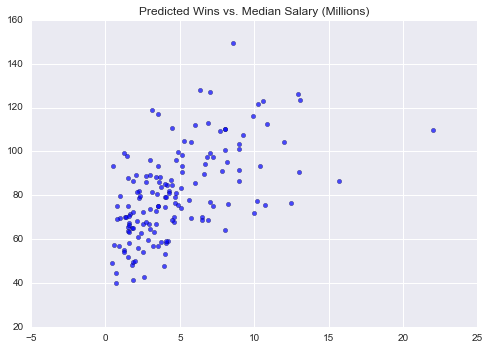

In [108]:
plt.scatter(sdf.salary/10**6, sdf.OPW, alpha=0.7)
plt.title("Predicted Wins vs. Median Salary (Millions)")

**There is no clear, stand-out trend**

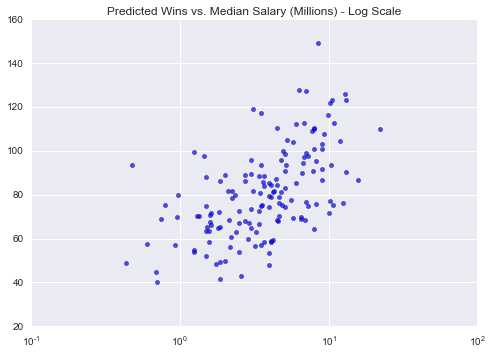

In [111]:
plt.scatter(sdf.salary/10**6, sdf.OPW, alpha=0.7)
plt.xscale('log')
plt.title("Predicted Wins vs. Median Salary (Millions) - Log Scale")

#### Problem 1(l)
Pick one players from one of each of these 10 position C, 1B, 2B, 3B, SS, LF, CF, RF, DH, or OF keeping the total median salary of all 10 players below 20 million. Report their averaged predicted wins and total salary.

- Want to create an optimization problem
- One way would be to simply pick cheapest players at their position
- Or we could pick players with best value i.e. maximize OPW:Salary, within left over salary bounds
    - But this would depend on which position you pick first?
    - So try to go through all such permutations

In [161]:
### Your code here ###
positions = ["C", "1B", "2B", "3B", "SS", "LF", "CF", "RF", "DH", "OF"]

res = []
total = 0

for pos in positions:
    k = sdf[sdf["POS"] == pos]
    m_ratio = -1
    m_index = 0
    for index, row in k.iterrows():
        if (float(row["OPW"]/row["salary"]) > m_ratio):
            m_ratio = float(row["OPW"]/row["salary"])
            m_index = index
    total += k.loc[m_index]["salary"]
    res.append(m_index)

In [162]:
total

21781666.5

Clearly, we exceed the total and do no real optimization

**Solution:** Iterate 10 times through an algorithm that selects players. In each iteration we pick a different position. We keep track of the bare minimum we would need to complete a team and keep at least that amount during each iteration. At each iteration we pick the player we can afford having the highest deviation from expected OPW given their salary.

In [187]:
# Normalize the OPW by position to compute a position specific residual using the meanNormalizeOPW function.
def meanNormalizeOPW(df):
    tmp = df[['resid']] 
    df[['resid']]=tmp-tmp.median(axis=0)
    return df

sdf['resid']=sdf['OPW']
sdf = sdf.groupby('POS').apply(meanNormalizeOPW)

In [188]:
# Fit a linear regression model and calculate the residuals.
from sklearn.linear_model import LinearRegression

X = np.log(sdf[["salary"]])
Y = sdf.resid.values

clf = LinearRegression()
clf.fit(X,Y)

sdf['resid'] = Y - clf.predict(X)

In [191]:
# We can take out the below average players.
sdf = sdf[sdf.resid >= 0]

In [206]:
sdf.head()

,playerID,1,2,3,HR,BB,startYear,endYear,OPW,POS,nameFirst,nameLast,salary,resid
3,alfoned01,0.013541,-0.002185,-0.003255,-0.006373,0.010738,1997,2004,84.589768,2B,Edgardo,Alfonzo,4112500.0,12.196118
9,aloumo01,0.004094,0.001009,-0.000408,0.010046,0.000702,1993,2004,93.546157,OF,Moises,Alou,5135000.0,4.343465
14,anderma02,0.017891,0.000812,0.001241,-0.019744,-0.026076,2001,2003,57.282892,2B,Marlon,Anderson,600000.0,9.037592
21,aurilri01,0.009741,-0.002436,-0.001822,0.000048,-0.026483,1999,2003,70.236795,SS,Rich,Aurilia,1300000.0,22.343794
28,bagweje01,-0.021194,0.002799,-0.002027,0.014081,0.053185,1991,2004,112.856589,1B,Jeff,Bagwell,6875000.0,7.607022


In [193]:
# Next, calculate the min salary by position. 
def getMinSalary(s):
    return s["salary"].min()

minSalaryByPos = sdf.groupby('POS').apply(getMinSalary)
minSalaryByPos.sort_values(ascending=False)

POS
C     8000000.0
3B    2100000.0
LF    2025000.0
OF    1500000.0
DH    1450000.0
1B    1250000.0
SS     687500.0
2B     432500.0
dtype: float64

In [194]:
posleft = list(minSalaryByPos.index)
print posleft

['1B', '2B', '3B', 'C', 'DH', 'LF', 'OF', 'SS']


In [195]:
moneyleft = 20*10**6

In [196]:
# Pick the player we can afford having the highest deviation from expected OPW given their salary.
indexes=[]
    
for i in range(len(posleft)):
    # You need to have at least this much left to not go over in the next picks
    maxmoney = moneyleft - sum([minSalaryByPos[x] for x in posleft[:-1] ])
    
    # Consider only players in positions we have not selected
    index = [True if elem in posleft else False for elem in sdf.POS.values]
    left = sdf[index & (sdf.salary <= maxmoney)]
    
    # Pick the one that stands out the most from what is expected given his salary
    j = left["resid"].argmax() 
    indexes.append(j)
    
    # Remove position we just filled from posleft
    posleft.remove(left.loc[j].POS)
    moneyleft = moneyleft - left.loc[j].salary
    
topPicks=sdf.loc[indexes,:]
topPicks=topPicks.sort_values(["OPW"],ascending=False)   

In [197]:
topPicks

,playerID,1,2,3,HR,BB,startYear,endYear,OPW,POS,nameFirst,nameLast,salary,resid
335,giambja01,-0.026569,-0.001396,-0.004037,0.019933,0.063815,1996,2008,119.107420,1B,Jason,Giambi,3103333.0,23.836756
713,piazzmi01,0.006885,-0.007399,-0.004271,0.026351,0.008523,1993,2004,110.133196,C,Mike,Piazza,8000000.0,22.499027
853,sweenmi01,0.017627,0.013500,-0.004299,0.007064,-0.004878,1999,2005,97.691983,DH,Mike,Sweeney,1450000.0,10.171431
55,bellhma01,-0.039016,0.002195,0.001311,0.005503,0.046596,2002,2004,93.506714,2B,Mark,Bellhorn,477500.0,48.126380
354,gonzalu01,-0.010610,0.006270,0.000540,0.002914,0.014497,1991,2007,89.159779,LF,Luis,Gonzalez,2025000.0,6.174923
649,muellbi02,0.017353,0.004915,-0.000275,-0.013771,0.007794,1998,2005,81.628973,3B,Bill,Mueller,2100000.0,9.893338
207,cruzjo02,-0.036321,-0.003554,0.002312,0.005187,0.012818,2000,2004,74.964695,OF,Jose,Cruz,1500000.0,1.200718
21,aurilri01,0.009741,-0.002436,-0.001822,0.000048,-0.026483,1999,2003,70.236795,SS,Rich,Aurilia,1300000.0,22.343794


In [201]:
print "Salary:", topPicks['salary'].sum()

Salary: 19955833.0


In [202]:
print "Wins:", round(topPicks['OPW'].mean())

Wins: 92.0


#### Problem 1(m)
What do these players outperform in? Singles, doubles, triples HR or BB?

In [205]:
# Change scales to better understand differences
def round1000(x):
    return np.round(x*1000)

topPicks[["1","2","3", "HR","BB"]] = topPicks[["1","2","3", "HR","BB"]].apply(round1000)
topPicks[["OPW"]] = np.round(topPicks[["OPW"]])
topPicks[["nameFirst","nameLast","POS","1","2","3","HR","BB","OPW","salary","startYear","endYear"]]

,nameFirst,nameLast,POS,1,2,3,HR,BB,OPW,salary,startYear,endYear
335,Jason,Giambi,1B,-27000.0,-1000.0,-4000.0,20000.0,64000.0,119.0,3103333.0,1996,2008
713,Mike,Piazza,C,7000.0,-7000.0,-4000.0,26000.0,9000.0,110.0,8000000.0,1993,2004
853,Mike,Sweeney,DH,18000.0,13000.0,-4000.0,7000.0,-5000.0,98.0,1450000.0,1999,2005
55,Mark,Bellhorn,2B,-39000.0,2000.0,1000.0,6000.0,47000.0,94.0,477500.0,2002,2004
354,Luis,Gonzalez,LF,-11000.0,6000.0,1000.0,3000.0,14000.0,89.0,2025000.0,1991,2007
649,Bill,Mueller,3B,17000.0,5000.0,-0.0,-14000.0,8000.0,82.0,2100000.0,1998,2005
207,Jose,Cruz,OF,-36000.0,-4000.0,2000.0,5000.0,13000.0,75.0,1500000.0,2000,2004
21,Rich,Aurilia,SS,10000.0,-2000.0,-2000.0,0.0,-26000.0,70.0,1300000.0,1999,2003


** Your answer here: **
- HR (w/ exception of 3B)
- BB (w/ exception of SS, DH)

## Discussion for Problem 1

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---
Linear regression can be used to create and optimize metrics that helped pick a team under 20 million that we predict to win 92 games in a season.

# Problem 2:  $k$-Nearest Neighbors and Cross Validation 

What is the optimal $k$ for predicting species using $k$-nearest neighbor classification 
on the four features provided by the iris dataset.

In this problem you will get to know the famous iris data set, and use cross validation to select the optimal $k$ for a $k$-nearest neighbor classification. This problem set makes heavy use of the [sklearn](http://scikit-learn.org/stable/) library. In addition to Pandas, it is one of the most useful libraries for data scientists! After completing this homework assignment you will know all the basics to get started with your own machine learning projects in sklearn. 

Future lectures will give further background information on different classifiers and their specific strengths and weaknesses, but when you have the basics for sklearn down, changing the classifier will boil down to exchanging one to two lines of code.

The data set is so popular, that sklearn provides an extra function to load it:

In [253]:
#load the iris data set
iris = sklearn.datasets.load_iris()

X = iris.data  
Y = iris.target

print X.shape, Y.shape

(150, 4) (150,)


#### Problem 2(a) 
Split the data into a train and a test set. Use a random selection of 33% of the samples as test data. Sklearn provides the [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html) function for this purpose. Print the dimensions of all the train and test data sets you have created. 

In [254]:
### Your code here ###
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(100, 4) (100,)
(50, 4) (50,)


#### Problem 2(b)

Examine the data further by looking at the projections to the first two principal components of the data. Use the [`TruncatedSVD`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) function for this purpose, and create a scatter plot. Use the colors on the scatter plot to represent the different classes in the target data. 

In [255]:
# Remember to Normalize before PCA -> Can be easily skewed by scale!
def normit(x, axis=0):
    return x - np.mean(x, axis=axis)

In [256]:
### Your code here ###
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD()

X_train_normal = normit(X_train)
X_fit = svd.fit_transform(X_train_normal)

print X_fit.shape

(100, 2)


In [257]:
print "2 components account for", svd.explained_variance_ratio_.sum()*100, "% of variance in data"

2 components account for 97.8814734356 % of variance in data


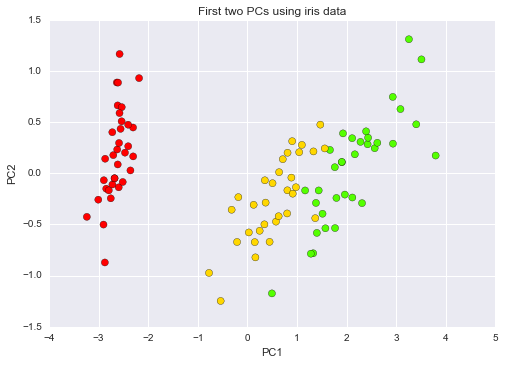

In [259]:
plt.scatter(X_fit[:,0], X_fit[:,1], c=y_train, s = 50, cmap=plt.cm.prism)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('First two PCs using iris data')
plt.show()

#### Problem 2(c) 

In the lecture we discussed how to use cross validation to estimate the optimal value for $k$ (the number of nearest neighbors to base the classification on). Use ***ten fold cross validation*** to estimate the optimal value for $k$ for the iris data set. 

**Note**: For your convenience sklearn does not only include the [KNN classifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), but also a [grid search function](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html#sklearn.grid_search.GridSearchCV). The function is called grid search, because if you have to optimize more than one parameter, it is common practice to define a range of possible values for each parameter. An exhaustive search then runs over the complete grid defined by all the possible parameter combinations. This can get very computation heavy, but luckily our KNN classifier only requires tuning of a single parameter for this problem set. 

In [282]:
# From Labs:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

def cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=5):
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(Xtrain, ytrain)
    print "BEST PARAMS", gs.best_params_
    return gs

In [296]:
# Try upto 20 neighbors:
k = np.arange(20)+1

In [297]:
gs = cv_optimize(KNeighborsClassifier(), {"n_neighbors": k}, X_train, y_train, n_folds=10)

BEST PARAMS {'n_neighbors': 1}


In [298]:
gs

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

**Strange result ---> k = 1**

#### Problem 2(d)

Visualize the result by plotting the score results versus values for $k$. 

In [299]:
### Your code here ###
gs.grid_scores_

/Users/Sachin/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.96000, std: 0.06111, params: {'n_neighbors': 1},
 mean: 0.93000, std: 0.07049, params: {'n_neighbors': 2},
 mean: 0.96000, std: 0.05899, params: {'n_neighbors': 3},
 mean: 0.96000, std: 0.05899, params: {'n_neighbors': 4},
 mean: 0.95000, std: 0.07900, params: {'n_neighbors': 5},
 mean: 0.96000, std: 0.05899, params: {'n_neighbors': 6},
 mean: 0.96000, std: 0.05899, params: {'n_neighbors': 7},
 mean: 0.95000, std: 0.06141, params: {'n_neighbors': 8},
 mean: 0.96000, std: 0.06991, params: {'n_neighbors': 9},
 mean: 0.94000, std: 0.07928, params: {'n_neighbors': 10},
 mean: 0.95000, std: 0.07154, params: {'n_neighbors': 11},
 mean: 0.94000, std: 0.07928, params: {'n_neighbors': 12},
 mean: 0.96000, std: 0.06991, params: {'n_neighbors': 13},
 mean: 0.94000, std: 0.07928, params: {'n_neighbors': 14},
 mean: 0.94000, std: 0.07928, params: {'n_neighbors': 15},
 mean: 0.94000, std: 0.07928, params: {'n_neighbors': 16},
 mean: 0.95000, std: 0.07154, params: {'n_neighbors': 17},
 mean:

In [304]:
k

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

/Users/Sachin/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


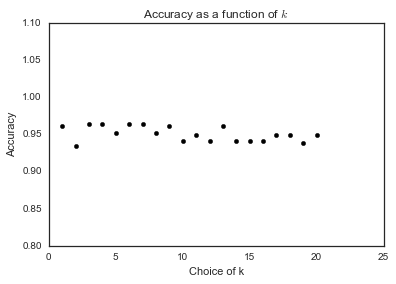

In [313]:
scores = [b.cv_validation_scores for b in gs.grid_scores_]
score_means = np.mean(scores, axis=1)

plt.ylim(0.8, 1.1)
plt.scatter(k,score_means, c='k', zorder=2)
plt.title('Accuracy as a function of $k$')
plt.ylabel('Accuracy')
plt.xlabel('Choice of k')
plt.show()

Verify that the grid search has indeed chosen the right parameter value for $k$.

In [311]:
gs.best_params_

{'n_neighbors': 1}

**Hmm, as per the plot - mean results betwenn 3 and 7 seem better than k = 1**

In [323]:
score_means

array([ 0.96111111,  0.93459596,  0.96313131,  0.96313131,  0.9520202 ,
        0.96313131,  0.96313131,  0.9520202 ,  0.96035354,  0.94090909,
        0.94924242,  0.94090909,  0.96035354,  0.94090909,  0.94090909,
        0.94090909,  0.94924242,  0.94924242,  0.93813131,  0.94924242])

#### Problem 2(e)

Test the performance of our tuned KNN classifier on the test set.

In [340]:
### Your code here ###

beat = 0
best = 0

for i in k:
    clf = KNeighborsClassifier(i)
    clf = clf.fit(X_train, y_train)
    test_accuracy = clf.score(X_test, y_test)
    if test_accuracy > beat:
        beat = test_accuracy
        best = i

print "k =", best
print "Acc =", beat

k = 7
Acc = 1.0


**A much better solution**

In [349]:
def computeTestScores(test_x, test_y, clf, cv):
    kFolds = sklearn.model_selection.KFold(n_splits=cv)

    scores = []
    for _, test_index in kFolds.split(test_x):
        test_data = test_x[test_index]
        test_labels = test_y[test_index]
        scores.append(sklearn.metrics.accuracy_score(test_labels, clf.predict(test_data)))
    return scores

In [354]:
for i in k:
    clf = KNeighborsClassifier(i)
    clf = clf.fit(X_train, y_train)
    scores = computeTestScores(test_x = X_test, test_y = y_test, clf=clf, cv=5)
    print "K =", i, " ", np.mean(scores), " ", np.std(scores)

K = 1   0.96   0.0489897948557
K = 2   0.96   0.0489897948557
K = 3   0.96   0.0489897948557
K = 4   0.98   0.04
K = 5   0.98   0.04
K = 6   0.98   0.04
K = 7   1.0   0.0
K = 8   0.96   0.0489897948557
K = 9   0.98   0.04
K = 10   0.96   0.0489897948557
K = 11   1.0   0.0
K = 12   0.98   0.04
K = 13   1.0   0.0
K = 14   1.0   0.0
K = 15   1.0   0.0
K = 16   0.98   0.04
K = 17   1.0   0.0
K = 18   0.98   0.04
K = 19   0.98   0.04
K = 20   0.96   0.0489897948557


## Discussion for Problem 2

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---
Using kNN and 10 fold cross-validation, we found optimum neighbors k = 7. Using GridSearch we got k = 1. Still trying to understand metrics behind different results. The iris data set separates well and predictions are quite reliable, shown by the test accuracy of nearly one.

# Problem 3: The Curse and Blessing of Higher Dimensions

In this problem we will investigate the influence of higher dimensional spaces on the classification. The data set is again one of the standard data sets from sklearn. The [digits data set](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) is similar to the MNIST data set discussed in the lecture. The main difference is, that each digit is represented by an 8x8 pixel image patch, which is considerably smaller than the 28x28 pixels from MNIST. In addition, the gray values are restricted to 16 different values (4 bit), instead of 256 (8 bit) for MNIST. 

First we again load our data set.

In [355]:
digits = sklearn.datasets.load_digits()

X = digits.data  
Y = digits.target

print X.shape, Y.shape

(1797, 64) (1797,)


#### Problem 3(a) 

Start with the same steps as in Problem 2. Split the data into train and test set. Use 33% of the samples as test data. Print the dimensions of all the train and test data sets you created. 

In [26]:
### Your code here ###

#### Problem 3(b) 

Similar to Problem 2(b), create a scatter plot of the projections to the first two PCs.  Use the colors on the scatter plot to represent the different classes in the target data. How well can we separate the classes?

**Hint**: Use a `Colormap` in matplotlib to represent the diferent classes in the target data. 

In [27]:
### Your code here ###

Create individual scatter plots using only two classes at a time to explore which classes are most difficult to distinguish in terms of class separability.  You do not need to create scatter plots for all pairwise comparisons, but at least show one. 

In [28]:
### Your code here ###

Give a brief interpretation of the scatter plot. Which classes look like hard to distinguish? Do both feature dimensions contribute to the class separability? 

** Your answer here: **

#### Problem 3(c) 

Write a **ten-fold cross validation** to estimate the optimal value for $k$ for the digits data set. *However*, this time we are interested in the influence of the number of dimensions we project the data down as well. 

Extend the cross validation as done for the iris data set, to optimize $k$ for different dimensional projections of the data. Create a boxplot showing test scores for the optimal $k$ for each $d$-dimensional subspace with $d$ ranging from one to ten. The plot should have the scores on the y-axis and the different dimensions $d$ on the x-axis. You can use your favorite plot function for the boxplots. [Seaborn](http://web.stanford.edu/~mwaskom/software/seaborn/index.html) is worth having a look at though. It is a great library for statistical visualization and of course also comes with a [`boxplot`](http://web.stanford.edu/~mwaskom/software/seaborn/generated/seaborn.boxplot.html) function that has simple means for changing the labels on the x-axis.

In [29]:
### Your cross validation and evaluation code here ###

In [30]:
### Your boxplot code here ### 

Write a short interpretation of the generated plot, answering the following questions:

* What trend do you see in the plot for increasing dimensions?

* Why do you think this is happening?

** Your answer here: **

#### Problem 3(d) 

**For AC209 Students**: Change the boxplot we generated above to also show the optimal value for $k$ chosen by the cross validation grid search. 

In [31]:
### Your code here ### 

Write a short interpretation answering the following questions:

* Which trend do you observe for the optimal value of $k$?

* Why do you think this is happening?

** Your answer here: **

## Discussion for Problem 3

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---